In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from evaluate_prf1 import prf1_sweep

In [2]:
# results_dir = "/home/masonbp/results/west_point_2023/segment_align/14_param_sweep/00"
results_dir = "/home/lucas/Workspace/sparse_mapping/segment_track/align/output"
# sub_dirs = [
#     "kmd",
#     # "sparkal2_sparkal1_same",
#     # "acl_jackal2_sparkal2_same",
#     # "acl_jackal2_sparkal1_same",
#     # "sparkal2_sparkal1_opposite",
#     # "acl_jackal2_sparkal2_perpendicular",
#     # "acl_jackal2_sparkal1_perpendicular",
# ]

# methods = ["point2d", "point3d", "vol2d", "vol3d", "gravity", "volgrav", "prunevol2d", "prunevol3d", "prunegrav", "prunevolgrav", "distfeatpca"]
# methods = [k for k in range(30)]
line_styles = [':', '--', '-.']

In [3]:
%matplotlib widget

In [4]:
plt.close()

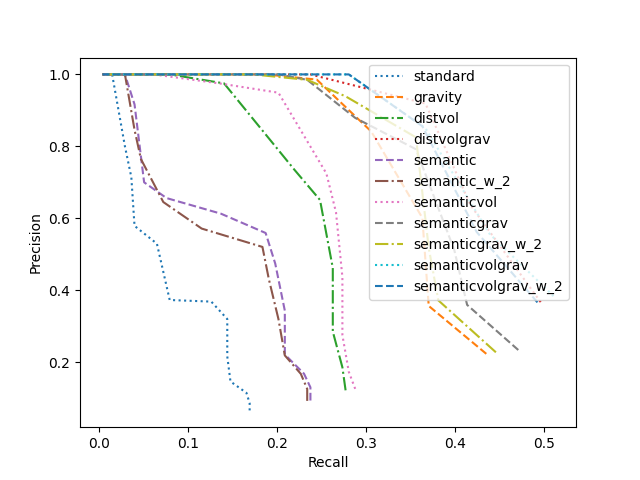

In [5]:
plt.close()
fig, ax = plt.subplots()
# methods = ["distfeatpca", "volgrav", "gravity", "prunevol3d", "prunegrav", "point3d", "distfeatpca2"]
# methods = ["point3d", "prunegrav", "prunevol3d", "gravity",  "volgrav", "oriented_bbox_grav", "pcavolgrav_1"]
# methods = ["point3d", "prunegrav", "prunevol3d", "gravity", "pcavolgrav_1", "prunevolgrav", "extentvolgrav_0", "extentvolgrav_1"]
# methods = ["standard", "gravity", "distvol", "distvolgrav", 
#            "prunevol","prunevolgrav", "prunegrav", "distfeatpca", 
#            "semantic", "semanticgrav", "semanticvolextent", "semanticvolextentgrav"]
methods = ["standard", "gravity", "distvol", "distvolgrav", "semantic", "semantic_w_2", "semanticvol", "semanticgrav", "semanticgrav_w_2", "semanticvolgrav", "semanticvolgrav_w_2"]
# methods = ["point3d", "prunegrav", "prunevol3d", "gravity",  "pcavolgrav_2"]

req_err_ang = 5
req_err_dist = 2.5
req_overlap = 0.5
for i, method in enumerate(methods):
    try:
        precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{method}_mat"], req_overlap=req_overlap, req_err_ang=req_err_ang, req_err_dist=req_err_dist)
    except OSError as e:
        continue
    ax.plot(recalls, precisions, label=method, linestyle=line_styles[i % len(line_styles)])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
# plt.show()
# plt.savefig("/home/masonbp/figs/outdoor_global_loc_rss24/kmd_pr.pdf")
plt.show()
    